# Finding the best chocolate bars

A specialty foods import company wants to expand into gourmet chocolate bars.

There is a demand:
* **to research** the market
* **to inform** the initial approach to potential suppliers

**Project task:**

based on data:

* "id" - id number of the review
* "manufacturer" - Name of the bar manufacturer
* "company_location" - Location of the manufacturer
* "year_reviewed" - From 2006 to 2021
* "bean_origin" - Country of origin of the cacao beans
* "bar_name" - Name of the chocolate bar
* "cocoa_percent" - Cocoa content of the bar (%)
* "num_ingredients" - Number of ingredients
* "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
* "review" - Summary of most memorable characteristics of the chocolate bar
* "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

**To explore** if the chocolate bars with the highest ratings share any characteristics that could help to narrow the search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

**To create a report** to summarize the research, answering the questions:
* What is the average rating by country of origin?
* How many bars were reviewed for each of those countries?
* Is the cacao bean's origin an indicator of quality?
* How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
* What is the average rating of bars with and without lecithin (L in the ingredients).

**To summarize** the findings.

## Workspace preparation and Data load

In [1]:
# we upload the libraries,
# prepare the working space

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 110)

In [2]:
# we read the data
data = pd.read_csv('data/chocolate_bars.csv')

# we take a look at random data points
data.sample(5)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
588,445,Chuao Chocolatier,U.S.A.,2009,Venezuela,Choroni,61.0,5.0,"B,S,C,V,L","sweet, peanut butter",3.00
340,1980,Brasstown aka It's Chocolate,U.S.A.,2017,Dominican Republic,Elvesia P.,70.0,3.0,"B,S,C","earthy, cherries",3.25
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
1917,1530,Pump Street Bakery,U.K.,2015,Madagascar,"Akesson's, batch 4411",74.0,3.0,"B,S,C","dairy, butterscotch, caramel",3.50
1105,1602,Guittard,U.S.A.,2015,Blend,"Epique, Blend No. 49",70.0,5.0,"B,S,C,V,L","nutty, black licorice",3.75


In [3]:
# we check the general info on the table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [4]:
# we check duplicates
print('Number of duplicates in the table:', data.duplicated().sum())

Number of duplicates in the table: 0


In [5]:
# we check missing values
print('Number of missing values in table:\n', data.isna().sum())

Number of missing values in table:
 id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64


In [6]:
# we read missing values
data_isna = data[data['num_ingredients'].isna()]
display(data_isna)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70.0,NaN,NaN,"raisins, pungent",3.00
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70.0,NaN,NaN,"few grits, blackcherry, licorice",3.50
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,NaN,NaN,"very nutty, very bitter",1.75
293,81,Bonnat,France,2006,Blend,One Hundred,100.0,NaN,NaN,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100.0,NaN,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...,...
2424,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100.0,NaN,NaN,"bland, mild fruit, strong bitter",2.00
2425,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90.0,NaN,NaN,"some fruit, strong bitter",2.00
2426,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75.0,NaN,NaN,"cocoa,earthy,very astringent",3.00
2447,733,Whittakers,New Zealand,2011,Ghana,Ghana,72.0,NaN,NaN,"sticky, dry, vanilla dominates",2.50


In [7]:
# we study number of missing values in category grouped by review id
display(data_isna.groupby('id')['bar_name'].count().reset_index()\
        .rename(columns={'bar_name':'isna_count'}).sort_values('isna_count', ascending=False))

,id,isna_count
12,404,5
21,615,4
52,1892,4
54,2084,3
7,296,3
43,1109,3
17,552,3
16,544,3
6,292,3
3,153,3


In [8]:
# we check review with id 404 with biggest number of missing values
display(data[data['id'] == 404])

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
496,404,Cemoi,France,2009,Ecuador,Equateur,72.0,NaN,NaN,"sticky, mild mint, bitter",2.75
1278,404,Kaoka (Cemoi),France,2009,Blend,Noir,70.0,NaN,NaN,mild bitter and chemical off,2.75
2032,404,Santander (Compania Nacional),Colombia,2009,Colombia,Colombian 2008,75.0,3.0,"B,S,L","roasty,rich cocoa,marshmallow",2.75
2402,404,Vao Vao (Chocolaterie Robert),Madagascar,2009,Madagascar,Madagascar,72.0,3.0,"B,S,C","fatty, bland, very astringent",2.75
2403,404,Vao Vao (Chocolaterie Robert),Madagascar,2009,Madagascar,Madagascar,76.0,4.0,"B,S,C,V","fatty, sour, spoiled",2.75
2404,404,Vao Vao (Chocolaterie Robert),Madagascar,2009,Madagascar,Madagascar,80.0,4.0,"B,S,C,V","fatty, bitter, sour",2.75
2405,404,Vao Vao (Chocolaterie Robert),Madagascar,2009,Madagascar,Madagascar,70.0,NaN,NaN,"oily, fatty, citrus",3.00
2406,404,Vao Vao (Chocolaterie Robert),Madagascar,2009,Madagascar,Madagascar w/ nibs,68.0,NaN,NaN,"oily, nutty, fatty",3.00
2407,404,Vao Vao (Chocolaterie Robert),Madagascar,2009,Madagascar,Madagascar,64.0,NaN,NaN,"sandy, mild citrus, sweet",3.25


In [9]:
# we delete entries with NAN values
data = data.dropna()
data.isna().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

In [10]:
# we convert data type in column year_reviewed from int to datetime64,
# we convert data type in column id from int to object
data['id'] = data['id'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2443 non-null   object 
 1   manufacturer      2443 non-null   object 
 2   company_location  2443 non-null   object 
 3   year_reviewed     2443 non-null   int64  
 4   bean_origin       2443 non-null   object 
 5   bar_name          2443 non-null   object 
 6   cocoa_percent     2443 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2443 non-null   object 
 10  rating            2443 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 229.0+ KB


### Conclusions
* the table contains 2530 entries & 11 columns
* the table has no duplicates
* the table has 87 missing values in column *ingridients* & in parallel 87 missing values in column *num_ingidients*
* entries with NAN make 3% of total entries
* no patterns are noticed in NAN spread among entries
* entries with NAN are dropped
* data type in column in column *id* from int to object formats

## EDA

### Numeric features: *year_reviewed, cocoa_percent, num_ingredients, rating*

In [11]:
# we check stat values of numeric features
data.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,2443.000000,2443.000000,2443.000000,2443.00000
mean,2014.485878,71.496725,3.041343,3.21009
std,3.957507,5.156974,0.913728,0.42837
min,2006.000000,42.000000,1.000000,1.00000
25%,2012.000000,70.000000,2.000000,3.00000
50%,2015.000000,70.000000,3.000000,3.25000
75%,2018.000000,74.000000,4.000000,3.50000
max,2021.000000,100.000000,6.000000,4.00000


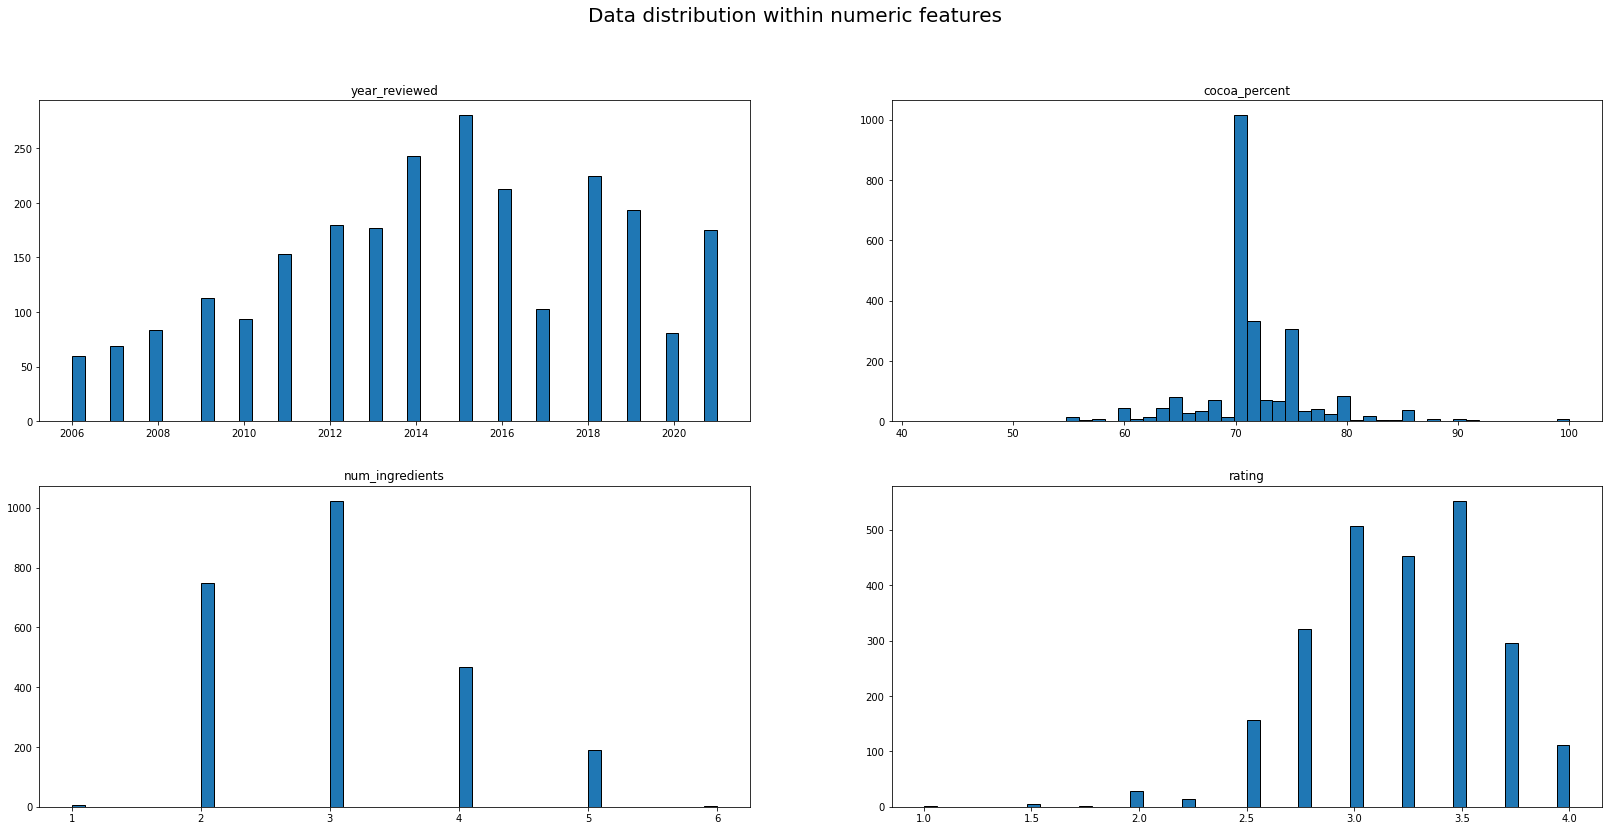

In [12]:
# we check data distribution within numeric features
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(28, 13)
fig.suptitle('Data distribution within numeric features', fontsize=20)
axes = axes.ravel()
i = 0
columns = ['year_reviewed', 'cocoa_percent', 'num_ingredients', 'rating']
for column in columns:
    axes[i].hist(data[column], edgecolor = 'black', fill = True, bins=50)
    axes[i].set(title = column)
    i+=1
fig.show()

**Data & graphics conclusions**
* feature **year_reviewed**
>
> the rating data is collected in the range of 2006 - 2021 years
>
> the number of records in reports has growing trend from 2006 till 2015
>
> starting from 2016 the trend changes its character to cut edge decline with its minimum in 2020
>
* feature **cocoa_percent**
>
> in average the products contain 71,5% of cocoa
>
> minimum is 42%
>
> maximum is 100%
>
> 25% of products contain between 74% & 100%
>
* feature **num_ingridients**
>
> in average the products contain 3 ingredients
>
> minimum is 1
>
> maximum is 6
>
> 25% of products contain between 4 & 6 ingredients
>
* feature **rating**
>
> in average the products have rating 3,2
>
> minimum  rating is 1
>
> maximum is 4
>
> 25% of products have rating between 3,5 & 4
>

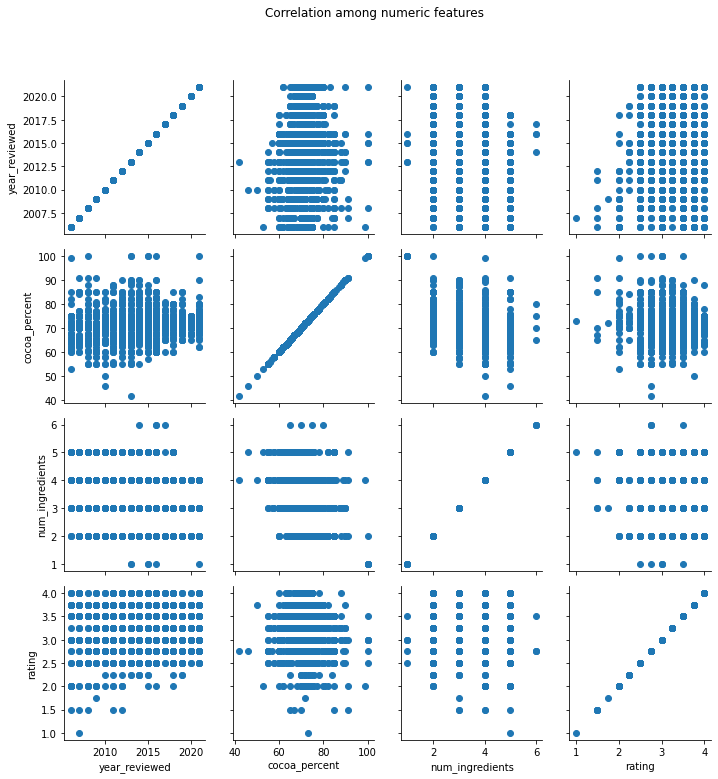

In [13]:
# we check correlation among numeric features
pair_grid = sns.PairGrid(data.drop('id', axis=1))
pair_grid.map(plt.scatter)
pair_grid.fig.suptitle("Correlation among numeric features", y=1.08);

**Data & graphics conclusions** 
* no obvious correlation is detected among features *year_reviewed, cocoa_percent, num_ingredients, rating*

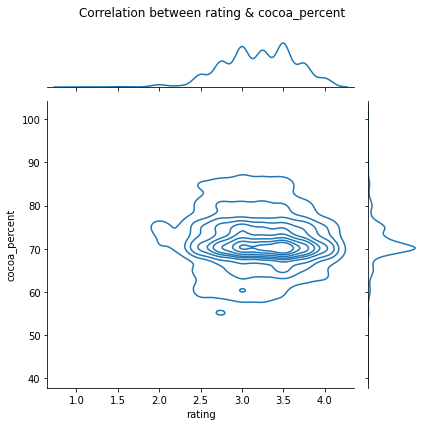

In [14]:
# we check correlation between rating & cocoa_percent
p = sns.jointplot(x='rating', y='cocoa_percent'\
              , data=data, kind='kde')
p.fig.suptitle("Correlation between rating & cocoa_percent")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9);

In [15]:
# we check the cocoa content of top ratings
display(data[data['rating'] >=3.5].groupby('rating')['cocoa_percent'].describe())

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3.50,552.0,71.229167,4.423838,55.0,70.0,70.0,73.0,100.0
3.75,295.0,71.106780,3.673719,50.0,70.0,70.0,73.0,90.0
4.00,111.0,70.702703,3.383367,60.0,70.0,70.0,72.0,88.0


**Data & graphics conclusions**
* highest ratings have cocoa average content between 71,11 & 70.70
* minimums are between 50 & 60
* maximums are between 88 & 100
* the median is one for all groups and is equal to 70%
* 70% is the most frequent content in the dataset

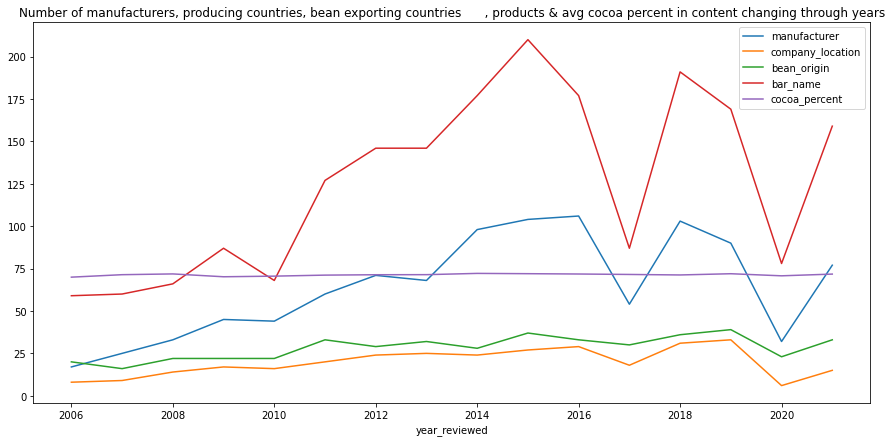

In [16]:
# we check how the number of manufacturers, producing countries, bean exporting countries,
# products & avg cocoa percent in content change through years
data.groupby('year_reviewed').agg({'manufacturer':'nunique', 'company_location':'nunique'\
                                   , 'bean_origin':'nunique'\
                                   , 'bar_name':'nunique', 'cocoa_percent':'mean'})\
.plot(kind='line'\
      , title=('Number of manufacturers, producing countries, bean exporting countries\
      , products & avg cocoa percent in content changing through years'), figsize=(15, 7));

**Data & graphics conclusions** 
* the most stable behavior through years has the average meaning of *cocoa content*
* number of manufacturers & number of products have similar, but not always repeating trnds; 2009, 2012, 2015 & 2018 are marked with sharp jumps up; 2010, 2017 & 2020 years are marked with sharp drop downs
* 2020 is the drop down year as well for the number of bean exporting countries & number of manufacturers

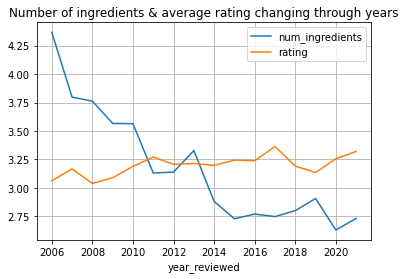

In [17]:
# we check how the number of ingredients & avg rating change through years
data.groupby('year_reviewed').agg({'num_ingredients':'mean', 'rating':'mean'})\
.plot(kind='line', title=('Number of ingredients & average rating changing through years'), grid=True);

**Data & graphics conclusions** 
* average number of ingredients & average rating have contradictory trends through years
* the average number of ingredients was dropping down from 4.45 to 2.75
* the average rating was growing from 3.1 to 3.35
* in 2021 both trends get growing in parallel

### Categorical features: *bean_origin*

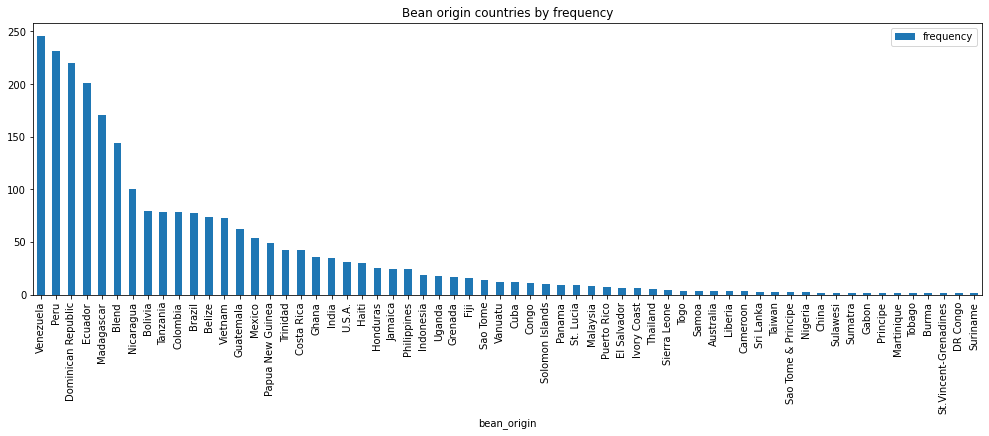

In [18]:
# we check bean_origin feature by frequency
data_bean_origin_frequency = data.bean_origin.value_counts()\
.reset_index().rename(columns={'index':'bean_origin', 'bean_origin':'frequency'})
data_bean_origin_frequency.plot(kind='bar', x='bean_origin', figsize=(17,5)\
                                , title=('Bean origin countries by frequency'));

In [19]:
# we check bean_origin feature by rating
data_bean_origin_rating = data.groupby('bean_origin')['rating'].mean()\
.reset_index().sort_values('rating', ascending=False).rename(columns=({'rating':'rating_avg'}))
display(data_bean_origin_rating.head(10).style.background_gradient(cmap='Blues'))

,bean_origin,rating_avg
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
53,Thailand,3.300000
11,Cuba,3.291667
61,Vietnam,3.287671
35,Papua New Guinea,3.280612
28,Madagascar,3.270468
21,Haiti,3.266667


In [20]:
# we make rating list of bean_origin countries by frequency
data_bean_origin_frequency['bean_origin_frequency_position'] = np.arange(len(data_bean_origin_frequency))

# we make rating list of bean_origin countries by rating
data_bean_origin_rating['bean_origin_rating_position'] = np.arange(len(data_bean_origin_rating))

# we match country positions by rating & frequency
data_bean_origing_rating_list = data_bean_origin_rating.merge(data_bean_origin_frequency, on='bean_origin')
display(data_bean_origing_rating_list.sort_values('bean_origin_frequency_position'))

,bean_origin,rating_avg,bean_origin_rating_position,frequency,bean_origin_frequency_position
22,Venezuela,3.239837,22,246,0
23,Peru,3.228355,23,231,1
24,Dominican Republic,3.219318,24,220,2
26,Ecuador,3.213930,26,201,3
8,Madagascar,3.270468,8,171,4
...,...,...,...,...,...
16,Tobago,3.250000,16,1,57
51,Burma,3.000000,51,1,58
60,St.Vincent-Grenadines,2.750000,60,1,59
52,DR Congo,3.000000,52,1,60


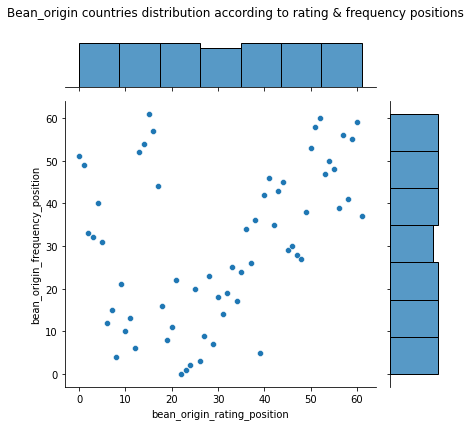

In [21]:
# we plot bean_origin countries distribution according to rating & frequency positions
p = sns.jointplot(x='bean_origin_rating_position', y='bean_origin_frequency_position'\
              , data=data_bean_origing_rating_list)
p.fig.suptitle("Bean_origin countries distribution according to rating & frequency positions")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9);

In [22]:
# we make final top list of bean_origin countries that belong both to top 20 rating & frequency lists
data_bean_origing_rating_list_top\
= data_bean_origing_rating_list[(data_bean_origing_rating_list['bean_origin_rating_position'] <=20)\
                                & (data_bean_origing_rating_list['bean_origin_frequency_position'] <=20)]
data_bean_origing_rating_list_top

,bean_origin,rating_avg,bean_origin_rating_position,frequency,bean_origin_frequency_position
6,Vietnam,3.287671,6,73,12
7,Papua New Guinea,3.280612,7,49,15
8,Madagascar,3.270468,8,171,4
10,Brazil,3.259740,10,77,10
11,Guatemala,3.258065,11,62,13
12,Nicaragua,3.255000,12,100,6
18,Trinidad,3.244048,18,42,16
19,Tanzania,3.243590,19,78,8
20,Belize,3.243243,20,74,11


**Data & graphics conclusions**
* bean_origin countries that have highest average ratings do not have any visible share of the market wich means thay can not offer the best price & reliable supply
* the majority of most exporting countries have ratings less than *Recommended*
* 9 bean_origin countries:
1. Vietnam
2. Papua New Guinea
3. Madagascar
4. Brazil
5. Guatemala
6. Nicaragua
7. Trinidad
8. Tanzania
9. Beliz

have *Recommended* ratings (3,29 - 3,24) and belong to TOP 20 exporters

### Categorical features: *ingredients*

In [23]:
# we make the list of ingredients
data.ingredients.value_counts()

B,S,C           999
B,S             718
B,S,C,L         286
B,S,C,V,L       184
B,S,C,V         141
B,S*             31
B,S*,C,Sa        20
B,S*,C           12
B,S,L             8
B,S*,C,V          7
B                 6
B,S,C,V,Sa        6
B,S,V,L           5
B,S,C,Sa          5
B,S,C,V,L,Sa      4
B,S*,V,L          3
B,S,V             3
B,S*,C,L          2
B,S,C,L,Sa        1
B,C               1
B,S*,Sa           1
Name: ingredients, dtype: int64

In [24]:
# we add binar feature of Lecitin content in ingredients
data['l_index'] = np.where(data['ingredients'].str.contains('L'), 1, 0)
display(data.sample(2))

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,l_index
2064,2370,Shane Chocolate Works,U.S.A.,2019,Colombia,Colombia,70.0,3.0,"B,S,C","black pepper, astringent",3.0,0
151,2450,Arete,U.S.A.,2019,India,Idukki,70.0,3.0,"B,S,C","burn butterscotch, rubbery",3.0,0


In [25]:
# we create function to encode rating groups
def rating_group(rating):
    if rating <= 1.9:
        return 'unpleasant'
    if rating <= 2.9:
        return 'disappointing'
    if rating <= 3.49:
        return 'recommended'
    if rating <= 3.9:
        return 'highly recommended'
    else:
        return 'oustanding'

In [26]:
# we add feature of rating group
data['rating_group'] = data['rating'].apply(rating_group)

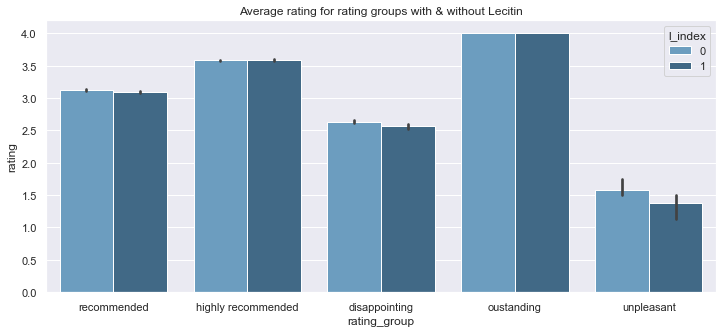

In [27]:
# we plot average rating for rating groups with & without Lecitin
sns.set(rc={'figure.figsize':(12,5)})
fig.suptitle('Average scores for students with/without the test preparation course', fontsize=15)
g = sns.barplot(x='rating_group', y='rating', hue='l_index', data=data, palette="Blues_d")\
.set_title('Average rating for rating groups with & without Lecitin');

**Data & graphics conclusions**
* the higher the rating group is the less difference in average rating is noticed between bars with & without Lecitin

In [28]:
# we make the rating of ingredient sets which enter the top rating groups
pd.crosstab(data.ingredients, data.rating_group, margins=True).sort_values('recommended', ascending=False)\
.style.background_gradient(cmap='Blues')

rating_group,disappointing,highly recommended,oustanding,recommended,unpleasant,All
ingredients,,,,,,
All,519,847,111,959,7,2443
"B,S,C",162,380,58,397,2,999
"B,S",147,264,26,281,0,718
"B,S,C,L",62,104,14,105,1,286
"B,S,C,V,L",50,50,11,71,2,184
"B,S,C,V",57,29,2,53,0,141
"B,S*",13,6,0,12,0,31
"B,S*,C,Sa",3,8,0,8,1,20
"B,S*,C,V",1,0,0,6,0,7


**Data & graphics conclusions**
* TOP 3 ingredient sets most often met in TOP 3 rating groups are:
1. B,S,C
2. B,S
3. B,S,C,L

### Categorical features: *manufacturer & company_location*

In [29]:
# we make TOP 10 manufacturer list based on average rating
data_manufacturer_top_10 = data.groupby(['manufacturer', 'company_location'])['rating'].mean().reset_index()\
.sort_values('rating', ascending=False).head(10)
display(data_manufacturer_top_10.style.background_gradient(cmap='Blues'))

,manufacturer,company_location,rating
241,Heirloom Cacao Preservation (Zokoko),U.S.A.,3.875000
379,Ocelot,Scotland,3.875000
328,Matale,Australia,3.812500
401,Patric,U.S.A.,3.791667
250,Idilio (Felchlin),Switzerland,3.775000
370,Nikoa,Ecuador,3.750000
263,Kah Kow,U.S.A.,3.750000
513,Utopick,Spain,3.750000
143,Cuna de Piedra,Mexico,3.750000
269,Kerchner,U.S.A.,3.750000


**Data & graphics conclusions**
* TOP 10 manufacturers have average ratings between 3.75 & 3.875
* The TOP 10 are spread among 4 continents

In [30]:
# we make TOP 10 company_location list with the bigest number of manufacturers
data.groupby('company_location').agg({'manufacturer':'nunique'}).reset_index()\
.sort_values('manufacturer', ascending=False).head(10)

,company_location,manufacturer
62,U.S.A.,244
7,Canada,31
61,U.K.,28
18,France,19
14,Ecuador,14
4,Belgium,12
29,Italy,11
2,Australia,10
30,Japan,10
57,Switzerland,10


In [31]:
# we check products & company_location spread among rating groups
pd.crosstab(data.company_location, data.rating_group, margins=True)\
.sort_values('recommended', ascending=False).head(10)\
.style.background_gradient(cmap='Blues')

rating_group,disappointing,highly recommended,oustanding,recommended,unpleasant,All
company_location,,,,,,
All,519,847,111,959,7,2443
U.S.A.,247,379,42,448,2,1118
Canada,28,63,15,68,0,174
France,29,65,17,56,1,168
U.K.,41,34,4,44,1,124
Italy,10,27,4,31,0,72
Belgium,8,18,5,27,2,60
Switzerland,5,13,6,20,0,44
Ecuador,16,12,3,19,1,51


**Data & graphics conclusions**
* manufacturers & their products located in the US make 50% of the rating list in general
* the US manufacturers keep the leadership in 3 TOP rating groups
* France took the 3d place with its products in TOP 3 rating groups

### Categorical features: review

,word,word_top_count
0,cocoa,222
42,fruit,121
9,nutty,121
79,creamy,118
48,rich,104
25,mild,93
12,roasty,84
51,floral,72
64,spicy,65
21,sweet,62


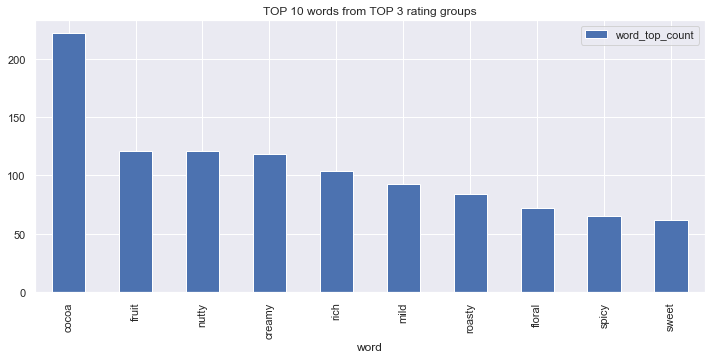

In [32]:
# we count review words more often met in TOP 3 rating groups
from collections import Counter
results = Counter()
data['review'] = data['review'].str.replace(',','')
data[data['rating'] >= 3.5]['review'].str.lower().str.split().apply(results.update)
words_counter = pd.DataFrame(results.items(), columns=['word', 'word_top_count'])
display(words_counter.sort_values('word_top_count', ascending=False).head(10))
words_counter.sort_values('word_top_count', ascending=False).head(10)\
.plot(kind='bar', x='word', title=('TOP 10 words from TOP 3 rating groups'));

**Data & graphics conclusions**
* the most friquently used word in top rating reviews is *cocoa* (222)
* *fruit & nutty* are equal in number (121)
* *creamy & rich* (118 & 104) finalize the top 5 list

### Conclusions

**The analysis of data based on chocolate products Review & Rating (2006 - 2021) allow the following initial approach to potential suppliers:**
* The market offers high rating manufacturers in all regions (USA, Canada, Latin America, Australia, Europe); the final choice depends on the marketing strategy: **to offer local product** or **to offer something exotic**
>
> **IF USA**: Zokoko (avg rating 3.875), Patric (avg rating 3.792), Kah Kow (avg rating 3.75)
>
> **IF Australia**: Matale (avg rating 3.813)
>
> **IF Latin America**: Nikoa / Ecuador (avg rating 3.75), Cuna de Piedra / Mexico (avg rating 3.75)
>
> **IF Europe**: Ocelot / Scotland (avg rating 3.875), Idilio (Felchlin) / Switzerland (avg rating 3.775), Utopick / Spain (avg rating 3.75)
>

are recommended to be contacted first.

* To meet the customer "high quality" expectations the product should possess the following characteristics:
>
> **cocoa content** - 70% is recommended
>
> **number of ingredients** - in average 3 ingredients meet the customer expectations: Beans (B), Sugar (S), Cocoa Butter (C); Lecitin (L) may be included, may be not, its presence does not influence the top ratings
>
> **bean origin** - we recommend the double approach, concidering ratings & market volumes; the recommended list is: **Vietnam, Papua New Guinea, Madagascar, Brazil, Guatemala, Nicaragua, Trinidad, Tanzania, Beliz**; beans imported from these countries belong both to TOP20 in ratings & TOP20 in frquency that gives the feeling of reliability and chance to negotiate the best price offer

*  To make the final choices in favor of some products it is recommended to run **tastings** and to check if the custemer reviews contain **key success words**:
>
> cocoa
>
> fruit
>
> nutty
>
> creamy
>
> rich